# Pesquisa salarial realizada pelo site https://www.freecodecamp.com/ com programadores de software nos EUA que frequentaram treinamentos Bootcamp.

Nesse exercício usarei uma pesquisa nos EUA sobre o mercado de trabalho para programadores de software. O objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidades de mais variávies, falhas na organização e necessidade de transformação.

In [2]:
# Importando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys 
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Carregando o dataset no dataframe
df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory=False)

In [5]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [6]:
# A função describe mostra um resumo estatístico do dataset 
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


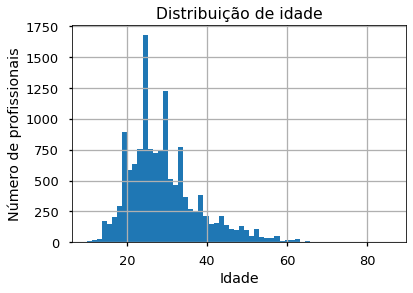

In [7]:
# Gerando um Histograma
df.Age.hist(bins = 60) # bins é a quantidade de colunas do histograma
plt.xlabel('Idade')
plt.ylabel('Número de profissionais')
plt.title("Distribuição de idade")
plt.show()

A maioria dos profissionais que trabalham como programadores de software estão na faixa de idade entre 20 e 30 anos, sendo que 25 anos é a idade mais frequente.

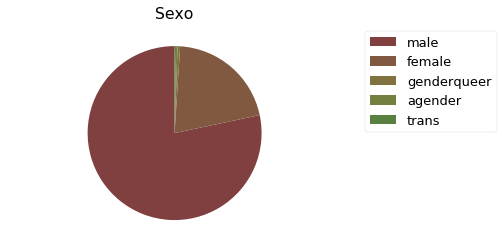

In [8]:
labels = df.Gender.value_counts().index # Primeiro coleto os labels, que são as opções definidas na coluna "Gender" 
num = len(df.EmploymentField.value_counts().index) # A função len calcula o tamanho de cada label

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x:colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title("Sexo")
plt.show()

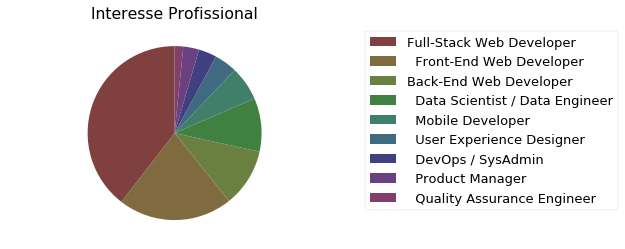

In [9]:
# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x:colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
color = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Grafico de pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title("Interesse Profissional")
plt.show()

O principal interesse dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), seguido pela área de Data Scientist.

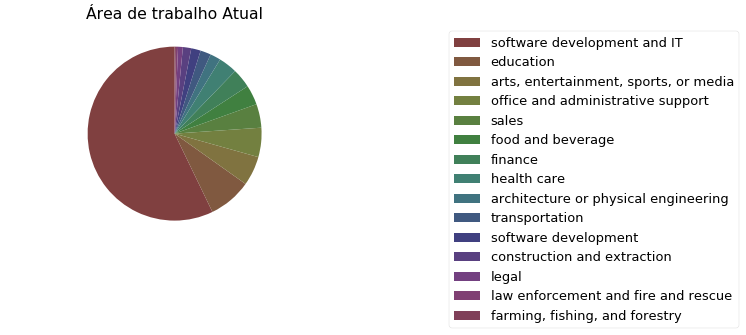

In [10]:
# Definindo a quantidade
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.EmploymentField.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title("Área de trabalho Atual")
plt.show()

A maioria dos programadores trabalham na área de desenvolvimento de softwares e TI, mas outras áreas como finanças e saúde também são significativas nesse dataset.

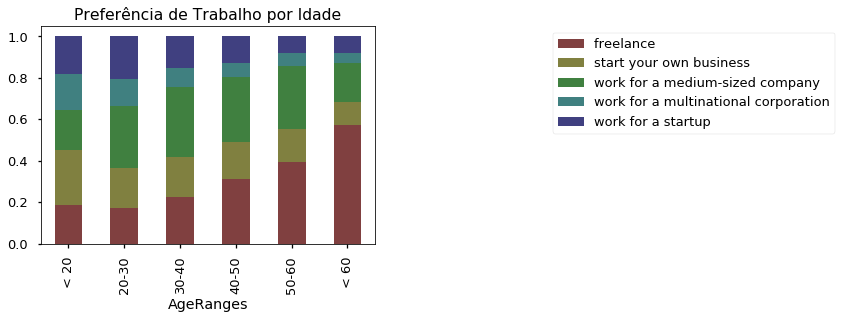

In [11]:
# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

A medida que a idade aumenta, o interesse por trabalho freelance também aumenta, sendo o modelo preferido por profissionais acima de 60 anos. 
Profissionais mais jovens preferem trabalhar em Startups ou no seu próprio negócio. 
Profissionais entre 20 e 50 anos preferem trabalhar em empresas de tamanho médio.

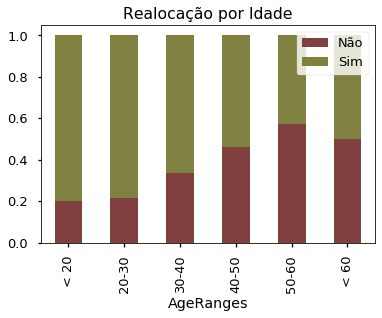

In [12]:
# Agrupando os dados
# O crosstab cruza duas informações "AgeRanges" e "JobRelocateYesNo"
df3 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, color = listaRGB, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

A vontade de buscar um novo emprego diminui com a idade. 
Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso.

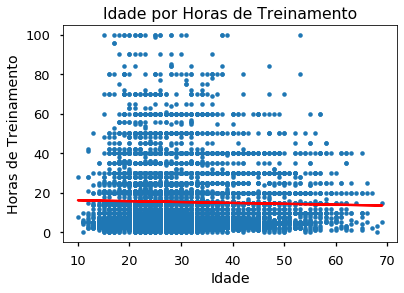

In [13]:
# Criando subset dos dados
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"]) # Deletando valores nulos em df9.HoursLearning
df9 = df9[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

A idade dos profissionais não afeta significativamente a quantidade de tempo gasto com capacitação e treinamento.